In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import csv

In [2]:
headers = ['symbol', 'loss', 'make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 
           'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 
           'engine_type', 'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke', 
           'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']

autodata = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data', 
                   header=None, names=headers, dtype=str)

In [3]:
autodata.columns = headers

In [4]:
autodata.head()

,symbol,loss,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.50,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.80,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.40,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450


In [5]:
autodata.tail()

,symbol,loss,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.10,...,141,mpfi,3.78,3.15,9.50,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.10,...,141,mpfi,3.78,3.15,8.70,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.10,...,173,mpfi,3.58,2.87,8.80,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.10,...,145,idi,3.01,3.40,23.00,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.10,...,141,mpfi,3.78,3.15,9.50,114,5400,19,25,22625


In [6]:
cat_vars = ['symboling', 'make','fuel_type','aspiration','num_of_doors','body_style','drive_wheels',
            'engine_location','engine_type', 'num_of_cylinders','fuel_system']
cnt_vars = [x for x in headers if x not in cat_vars]

In [7]:
autodata.replace('?', np.nan, inplace = True)

as_float = ['symbol', 'loss', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore',
            'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
autodata[as_float] = autodata[as_float].astype(float)

##another method### Changing the type of cnts cols to numeric from object
###autodata.loss = pd.to_numeric(autodata.loss, errors='coerce')
###autodata.bore = pd.to_numeric(autodata.bore, errors='coerce')
###autodata.stroke = pd.to_numeric(autodata.stroke, errors='coerce')
###autodata.horsepower = pd.to_numeric(autodata.horsepower, errors='coerce')
###autodata.peak_rpm = pd.to_numeric(autodata.peak_rpm, errors='coerce')
###autodata.price = pd.to_numeric(autodata.price, errors='coerce')

In [8]:
autodata.dtypes

symbol               float64
loss                 float64
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight          float64
engine_type           object
num_of_cylinders      object
engine_size          float64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg             float64
highway_mpg          float64
price                float64
dtype: object

In [9]:
# num_of_doors : categorical variable with 2 missing values : impute by max frequency
autodata.loc[autodata.num_of_doors=='?','num_of_doors']=autodata.num_of_doors.value_counts().index[0]

In [10]:
# removing 4 entries with missing values for Price variable
autodata = autodata[autodata.price.notnull()]

In [11]:
autodata.reset_index(drop=True, inplace=True)

In [12]:
# imputing cnts cols
autodata.loc[autodata.bore.isnull() , 'bore'] = autodata.bore.mean()
autodata.loc[autodata.stroke.isnull() , 'stroke'] = autodata.stroke.mean()
autodata.loc[autodata.horsepower.isnull() , 'horsepower'] = np.ceil(autodata.horsepower.mean())
autodata.loc[autodata.peak_rpm.isnull() , 'peak_rpm'] = np.ceil(autodata.peak_rpm.mean())

In [13]:
# This is not the right approach, but keeping it as of now!
autodata.loc[autodata.loss.isnull() , 'loss'] = autodata.loss.mean()

In [14]:
# Creating target variable on the basis of the rating of the cars
autodata.loc[autodata.symbol<=0,'target'] = 1  # Safe car
autodata.loc[autodata.symbol>0,'target'] = 0  # Risky car

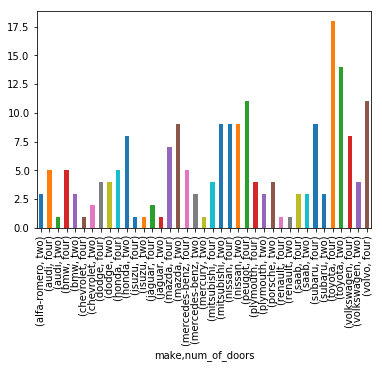

In [15]:
autodata.groupby(['make','num_of_doors']).size().plot(kind='bar')

In [16]:
# Handling the Categorical variables :
# Checking the frequencies of the Categorical variables, and labeling the entries with 'others' category which are
#     occurring lesser than 5% of the total number of cases (as of now 201 cases)

#[ 'make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 'drive_wheels', 'engine_location','engine_type', 'num_of_cylinders', 'fuel_system']

In [17]:
autodata.fuel_type.value_counts()

gas       181
diesel     20
Name: fuel_type, dtype: int64

In [18]:
autodata.aspiration.value_counts()

std      165
turbo     36
Name: aspiration, dtype: int64

In [19]:
autodata.num_of_doors.value_counts()

four    113
two      86
Name: num_of_doors, dtype: int64

In [20]:
autodata.body_style.value_counts()

sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body_style, dtype: int64

In [21]:
autodata.drive_wheels.value_counts()

fwd    118
rwd     75
4wd      8
Name: drive_wheels, dtype: int64

In [22]:
autodata.engine_location.value_counts()

front    198
rear       3
Name: engine_location, dtype: int64

In [23]:
autodata.engine_type.value_counts() 

ohc      145
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
Name: engine_type, dtype: int64

In [24]:
autodata.num_of_cylinders.value_counts() 

four      157
six        24
five       10
two         4
eight       4
three       1
twelve      1
Name: num_of_cylinders, dtype: int64

In [25]:
autodata.fuel_system.value_counts() 

mpfi    92
2bbl    64
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel_system, dtype: int64

In [26]:
print (autodata.shape)
print (autodata.shape)

(201, 27)
(201, 27)


In [27]:
# Dataframes for grouping mapping

# Grouping variables from above observation:
var_gp = ['make', 'body_style', 'num_of_cylinders' , 'fuel_system' ]
# Selecting only these variables from the DataFrame
auto_var_gp = autodata[var_gp]

#auto_make
# autodata.make.value_counts()
make_  = ['toyota', 'nissan', 'mazda', 'mitsubishi', 'honda', 'subaru', 'volkswagen', 'volvo', 'peugot']
others_ = ['others']*13
make_.extend(others_)
auto_make = pd.concat([pd.DataFrame( make_ , columns = ['make1']), 
                       pd.DataFrame( list(autodata.make.value_counts().index), columns = ['make'])], axis=1)

#auto_body_style
# autodata.body_style.value_counts()
body_style_  = ['sedan', 'hatchback', 'wagon', 'others', 'others']
auto_body_style = pd.concat([pd.DataFrame( body_style_ , columns = ['body_style1']), 
                       pd.DataFrame( list(autodata.body_style.value_counts().index), columns = ['body_style'])], axis=1)

#auto_num_of_cylinders
# autodata.num_of_cylinders.value_counts()
num_of_cylinders_  = ['four', 'six', 'five', 'others', 'others','others', 'others']
auto_num_of_cylinders = pd.concat([pd.DataFrame( num_of_cylinders_ , columns = ['num_of_cylinders1']), 
                       pd.DataFrame( list(autodata.num_of_cylinders.value_counts().index), columns = ['num_of_cylinders'])], axis=1)

#auto_fuel_system
# autodata.fuel_system.value_counts()
fuel_system_  = ['mpfi', '2bbl', 'idi', '1bbl', 'others','others','others','others']
auto_fuel_system = pd.concat([pd.DataFrame( fuel_system_ , columns = ['fuel_system1']), 
                       pd.DataFrame( list(autodata.fuel_system.value_counts().index), columns = ['fuel_system'])], axis=1)

In [28]:
# Map the new groups for to_be_grouped categorical variables
auto_var_gp1 = pd.merge(auto_var_gp,auto_make, on = ['make'], how = 'left')
auto_var_gp1 = pd.merge(auto_var_gp1,auto_body_style, on = ['body_style'], how = 'left')
auto_var_gp1 = pd.merge(auto_var_gp1,auto_num_of_cylinders, on = ['num_of_cylinders'], how='left')
auto_var_gp1 = pd.merge(auto_var_gp1,auto_fuel_system, on = ['fuel_system'], how='left')

# pd.merge(data_var_gp,df_pw, on = ['payment_way'])['payment_way_new'].value_counts()

In [29]:
auto_var_gp1.head()

,make,body_style,num_of_cylinders,fuel_system,make1,body_style1,num_of_cylinders1,fuel_system1
0,alfa-romero,convertible,four,mpfi,others,others,four,mpfi
1,alfa-romero,convertible,four,mpfi,others,others,four,mpfi
2,alfa-romero,hatchback,six,mpfi,others,hatchback,six,mpfi
3,audi,sedan,four,mpfi,others,sedan,four,mpfi
4,audi,sedan,five,mpfi,others,sedan,five,mpfi


In [30]:
auto_var_gp1.tail()

,make,body_style,num_of_cylinders,fuel_system,make1,body_style1,num_of_cylinders1,fuel_system1
196,volvo,sedan,four,mpfi,volvo,sedan,four,mpfi
197,volvo,sedan,four,mpfi,volvo,sedan,four,mpfi
198,volvo,sedan,six,mpfi,volvo,sedan,six,mpfi
199,volvo,sedan,six,idi,volvo,sedan,six,idi
200,volvo,sedan,four,mpfi,volvo,sedan,four,mpfi


In [31]:
auto_var_gp1.columns

Index(['make', 'body_style', 'num_of_cylinders', 'fuel_system', 'make1',
       'body_style1', 'num_of_cylinders1', 'fuel_system1'],
      dtype='object')

In [32]:
auto_var_gp1.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            191, 192, 193, 194, 195, 196, 197, 198, 199, 200],
           dtype='int64', length=201)

In [33]:
# Keep only new grouped categories
auto_var_gp1 = auto_var_gp1.drop(auto_var_gp.columns, axis=1,errors='ignore')

# Keep old column names for new grouped variables
auto_var_gp1.columns = auto_var_gp.columns

# Replace old to_be_grouped variables with the new grouping variables
autodata[var_gp] = auto_var_gp1

In [34]:
auto1 = autodata
# Saving DF before split into dummies in another DF for any exploration

In [35]:
autodata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 27 columns):
symbol               201 non-null float64
loss                 201 non-null float64
make                 201 non-null object
fuel_type            201 non-null object
aspiration           201 non-null object
num_of_doors         199 non-null object
body_style           201 non-null object
drive_wheels         201 non-null object
engine_location      201 non-null object
wheel_base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb_weight          201 non-null float64
engine_type          201 non-null object
num_of_cylinders     201 non-null object
engine_size          201 non-null float64
fuel_system          201 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    201 non-null float64
horsepower           20

In [36]:
autodata.describe()

,symbol,loss,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,target
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330711,3.256904,10.164279,103.402985,5117.59204,25.179104,30.686567,13207.129353,0.447761
std,1.254802,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.365650,478.11318,6.423220,6.815150,7947.066342,0.498505
min,-2.000000,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.00000,13.000000,16.000000,5118.000000,0.000000
25%,0.000000,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.00000,19.000000,25.000000,7775.000000,0.000000
50%,1.000000,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5118.00000,24.000000,30.000000,10295.000000,0.000000
75%,2.000000,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.00000,30.000000,34.000000,16500.000000,1.000000
max,3.000000,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.00000,49.000000,54.000000,45400.000000,1.000000


In [37]:
# Making dummy variables from the categorical variables now:
autodata1 = pd.get_dummies(autodata)
autodata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 57 columns):
symbol                     201 non-null float64
loss                       201 non-null float64
wheel_base                 201 non-null float64
length                     201 non-null float64
width                      201 non-null float64
height                     201 non-null float64
curb_weight                201 non-null float64
engine_size                201 non-null float64
bore                       201 non-null float64
stroke                     201 non-null float64
compression_ratio          201 non-null float64
horsepower                 201 non-null float64
peak_rpm                   201 non-null float64
city_mpg                   201 non-null float64
highway_mpg                201 non-null float64
price                      201 non-null float64
target                     201 non-null float64
make_honda                 201 non-null uint8
make_mazda                 201 no

In [38]:
# Removing 'symbol' here:  (For this use case)
autodata1 = autodata1.drop('symbol', 1)

In [39]:
# Checking for any NULL values as of now
null_vals = autodata1.isnull().sum()
null_vals[null_vals>0]

Series([], dtype: int64)

In [40]:
auto_y = autodata1[['target']]
# target1 = auto_y
auto_x= autodata1[[x for x in autodata1.columns if x not in 'target']]

In [41]:
print (auto_y.shape)
print (auto_x.shape)

(201, 1)
(201, 55)


In [42]:
auto_y.to_csv('auto_y.csv')
auto_x.to_csv('auto_x.csv')